<a href="https://colab.research.google.com/github/jedgarnaut/AWS-Certified-Cloud-Practitioner-Notes/blob/main/DOW_by_president.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
<ipython-input-7-94b2590751cd>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(presidents.keys()) * 2)  # Get a color map


No data found for George H. W. Bush (1989)
No data found for Ronald Reagan (1981)
No data found for Ronald Reagan (1985)
No data found for Jimmy Carter (1977)


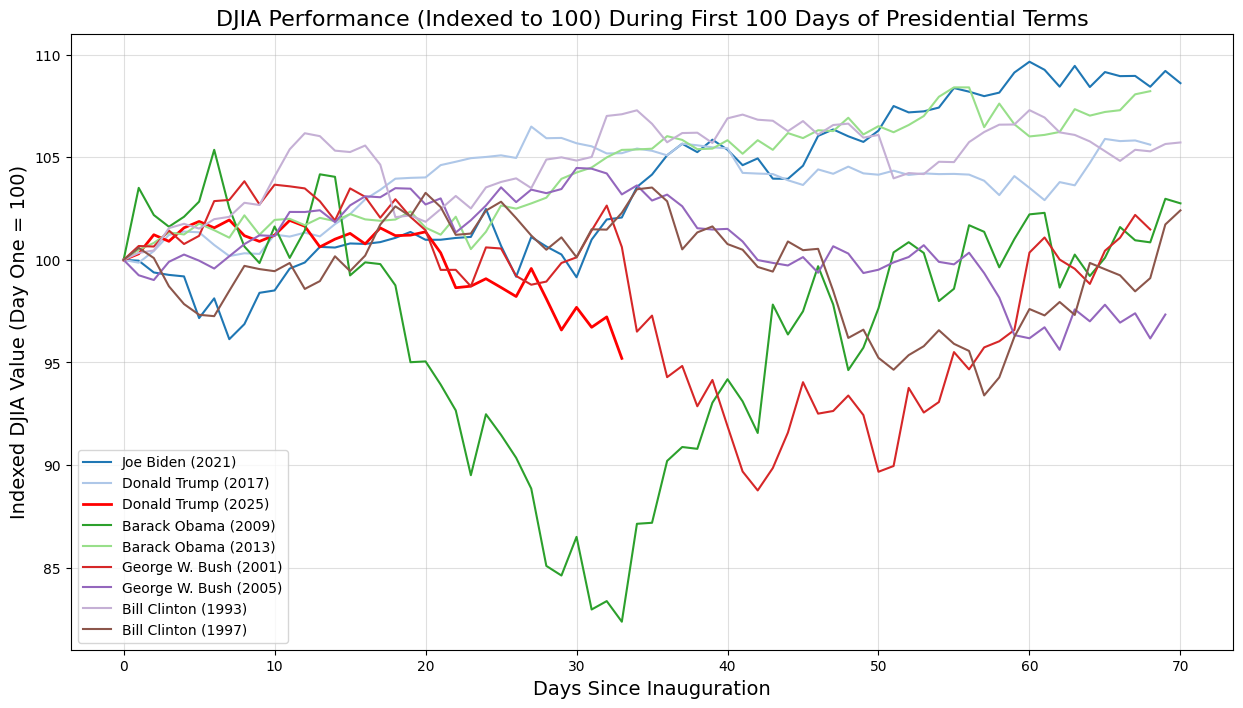

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

presidents = {
    "Joe Biden": "2021-01-20",
    "Donald Trump": ["2017-01-20", "2025-01-20"],
    "Barack Obama": ["2009-01-20", "2013-01-20"],
    "George W. Bush": ["2001-01-20", "2005-01-20"],
    "Bill Clinton": ["1993-01-20", "1997-01-20"],
    "George H. W. Bush": "1989-01-20",
    "Ronald Reagan": ["1981-01-20", "1985-01-20"],
    "Jimmy Carter": "1977-01-20"
}

djia_data = yf.download("^DJI", start="1970-01-01", end="2025-03-11")

colors = plt.cm.get_cmap('tab20', len(presidents.keys()) * 2)  # Get a color map
color_index = 0

plt.figure(figsize=(15, 8))
for president, start_date in presidents.items():
    if isinstance(start_date, list):
        for term_start in start_date:
            term_end = pd.to_datetime(term_start) + pd.DateOffset(days=100)
            term_data = djia_data.loc[term_start:term_end]['Close']
            # Check if term_data is empty before proceeding
            if term_data.empty:
                print(f"No data found for {president} ({term_start[:4]})")
                continue  # Skip to the next iteration
            normalized = (term_data / term_data.iloc[0]) * 100
            days_since_inauguration = range(len(normalized))

            # Highlight Donald Trump (2025)
            if president == "Donald Trump" and term_start[:4] == "2025":
                plt.plot(days_since_inauguration, normalized, label=f"{president} ({term_start[:4]})", color='red', linewidth=2)  # Use red color and thicker line
            else:
                plt.plot(days_since_inauguration, normalized, label=f"{president} ({term_start[:4]})", color=colors(color_index))

            color_index += 1
    else:
        term_end = pd.to_datetime(start_date) + pd.DateOffset(days=100)
        term_data = djia_data.loc[start_date:term_end]['Close']
        # Check if term_data is empty before proceeding
        if term_data.empty:
            print(f"No data found for {president} ({start_date[:4]})")
            continue  # Skip to the next iteration
        normalized = (term_data / term_data.iloc[0]) * 100
        days_since_inauguration = range(len(normalized))
        plt.plot(days_since_inauguration, normalized, label=f"{president} ({start_date[:4]})", color=colors(color_index))
        color_index += 1

plt.title("DJIA Performance (Indexed to 100) During First 100 Days of Presidential Terms", fontsize=16)
plt.xlabel("Days Since Inauguration", fontsize=14)
plt.ylabel("Indexed DJIA Value (Day One = 100)", fontsize=14)
plt.legend(loc="lower left", fontsize=10)  # Changed legend location
plt.grid(alpha=0.4)
plt.show()